In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    import mwinai
except:
    !pip install -U git+https://github.com/taller-mexicano-de-nebulosas-ionizadas/AI.git
    import mwinai

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)
def true_fun2(x):
    return np.sin(1.5 * np.pi * x)

# A random seed to reproduce the results
np.random.seed(0)

# The number of points used to fit the function
n_samples = 30

# Noise to be added to the points used to fit the function
noise = 0.1

# The training set: n_samples X points, with the noisy correspoing y  
X_train = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train) + np.random.randn(n_samples) * noise
y_train2 = true_fun2(X_train) + np.random.randn(n_samples) * noise

# The set of points to verify the fit quality
X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)
y_test2 = true_fun2(X_test)


In [16]:
RM = mwinai.manage_RM(RM_type='SK_ANN', X_train=X_train, y_train=y_train, scaling=True,
                      X_test = X_test, y_test=y_test, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, max_iter=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=True)

Instantiation. V 0.15
Training set size = 30, Test set size = 100
Train data scaled.
Test data scaled.
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Regression Model SK_ANN
Training 1 inputs for 1 outputs with 30 data
RM trained, with 100 iterations. Score = 0.950
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=1e-06,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.1 s.
Score = 0.975
Predicting from 1 inputs to 1 outputs using 100 data in 0.00 secs.


/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


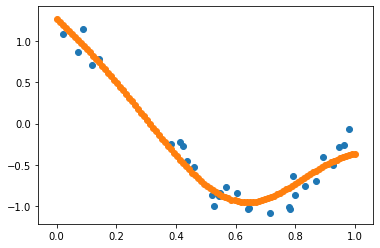

In [17]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred)

RM save to RM1
RM loaded from RM1.mwinai_sk
Training set size = 30, Test set size = 100
Test data scaled.
Training set size = 30, Test set size = 100
Predicting from 1 inputs to 1 outputs using 100 data in 0.00 secs.


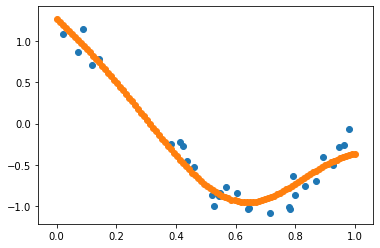

In [18]:
RM.save_RM('RM1')
RM_back = mwinai.manage_RM(RM_filename='RM1')
RM_back.set_test(X_test, scaleit=True)
RM_back.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back.X_test_unscaled, RM_back.pred)

In [22]:
RM = mwinai.manage_RM(RM_type='SK_ANN', X_train=X_train, y_train=np.array([y_train, y_train2]).T, scaling=True,
                      X_test = X_test, y_test=np.array([y_test, y_test2]).T, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, max_iter=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=True)

Instantiation. V 0.15
Training set size = 30, Test set size = 100
Train data scaled.
Test data scaled.
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Regression Model SK_ANN
Training 1 inputs for 2 outputs with 30 data
RM trained, with 100 iterations. Score = 0.937
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=1e-06,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.1 s.
Score = 0.937
Predicting from 1 inputs to 2 outputs using 100 data in 0.00 secs.


/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from

In [23]:
RM.pred.shape

(100, 2)

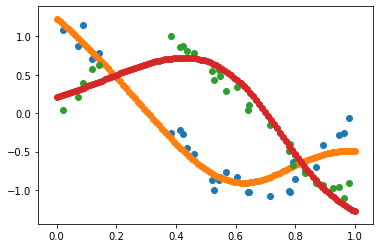

In [24]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM.X_test_unscaled, RM.pred[:,1])

RM save to RM2
RM loaded from RM2.mwinai_sk
Training set size = 30, Test set size = 100
Test data scaled.
Training set size = 30, Test set size = 100
Predicting from 1 inputs to 2 outputs using 100 data in 0.00 secs.


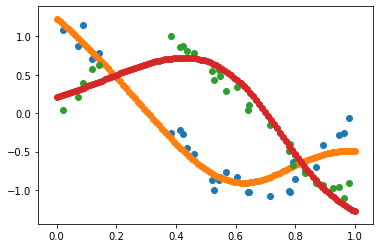

In [25]:
RM.save_RM('RM2')
RM_back2 = mwinai.manage_RM(RM_filename='RM2')
RM_back2.set_test(X_test, scaleit=True)
RM_back2.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back2.X_test_unscaled, RM_back2.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM_back2.X_test_unscaled, RM_back2.pred[:,1])

In [4]:
RM = mwinai.manage_RM(RM_type='K_ANN', X_train=X_train, y_train=y_train, scaling=True,
                      X_test = X_test, y_test=y_test, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, epochs=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=False)

Instantiation. V 0.15
Training set size = 30, Test set size = 100
Train data scaled.
Test data scaled.
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
Regression Model K_ANN
Training 1 inputs for 1 outputs with 30 data
Instructions for updati

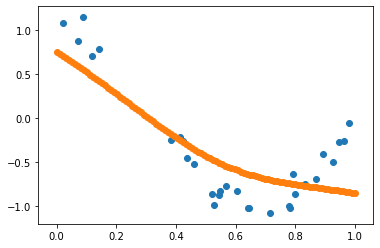

In [5]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred)

RM save to RM3
Instantiation. V 0.15
Training set size = 0, Test set size = 0
RM loaded from RM3.mwinai_k0
RM loaded from RM3.mwinai_k1
Training set size = 30, Test set size = 100
Test data scaled.
Training set size = 30, Test set size = 100
Predicting from 1 inputs to 1 outputs using 100 data in 0.27 secs.


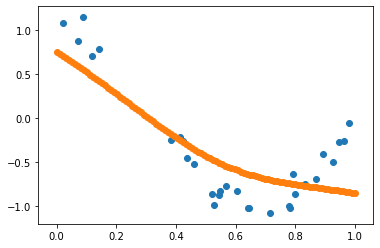

In [6]:
RM.save_RM('RM3')
RM_back3 = mwinai.manage_RM(RM_filename='RM3', verbose=True)
RM_back3.set_test(X_test, scaleit=True)
RM_back3.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back3.X_test_unscaled, RM_back3.pred)

In [7]:
RM = mwinai.manage_RM(RM_type='K_ANN', X_train=X_train, y_train=np.array([y_train, y_train2]).T, scaling=True,
                      X_test = X_test, y_test=np.array([y_test, y_test2]).T, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, epochs=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=False)

Instantiation. V 0.15
Training set size = 30, Test set size = 100
Train data scaled.
Test data scaled.
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 10,502
Trainable params: 10,502
Non-trainable params: 0
_________________________________________________________________
Regression Model K_ANN
Training 1 inputs for 2 outputs with 30 data
RM trained. Score = nan
Training time 1.8 s.
Predicting from 1 inputs to 2 outputs using 100 data in 0.15 secs.


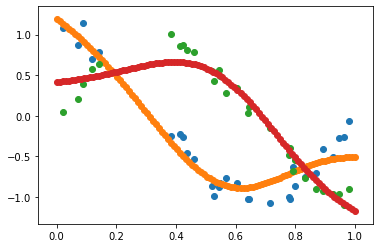

In [8]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM.X_test_unscaled, RM.pred[:,1])

RM save to RM4
RM loaded from RM4.mwinai_k1
Training set size = 30, Test set size = 100
Test data scaled.
Training set size = 30, Test set size = 100
Predicting from 1 inputs to 2 outputs using 100 data in 0.53 secs.


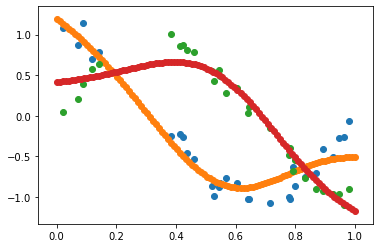

In [9]:
RM.save_RM('RM4')
RM_back4 = mwinai.manage_RM(RM_filename='RM4')
RM_back4.set_test(X_test, scaleit=True)
RM_back4.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back4.X_test_unscaled, RM_back4.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM_back4.X_test_unscaled, RM_back4.pred[:,1])

In [11]:
!ls -lh RM*

-rw-------  1 christophemorisset  staff   333K Sep 26 20:16 RM1.mwinai_sk
-rw-------  1 christophemorisset  staff   336K Sep 26 20:18 RM2.mwinai_sk
-rw-------  1 christophemorisset  staff   679B Sep 26 20:34 RM3.mwinai_k0
-rw-------  1 christophemorisset  staff   149K Sep 26 20:34 RM3.mwinai_k1
-rw-------  1 christophemorisset  staff   679B Sep 26 20:36 RM4.mwinai_k0
-rw-------  1 christophemorisset  staff   149K Sep 26 20:36 RM4.mwinai_k1
